In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
from collections import defaultdict
from paper_sims_util import (confusion, MCC)

In [20]:
def plot_curves(N_to_res, omega, title):
    Ns = N_to_res.keys()
    method_to_list = defaultdict(list)
    for N, results in N_to_res.items():
        for method, res in results.items():
            if type(res) == dict:
                sub_MCCs = []
                for par, prec in res.items():
                    if prec is not None:
                        sub_MCCs.append(MCC(prec, omega))
                if len(sub_MCCs) == 0:
                    method_to_list[method].append(0)
                else:
                    method_to_list[method].append(max(sub_MCCs))
            else:
                method_to_list[method].append(MCC(res, omega))
    print(method_to_list)
    for method, l in method_to_list.items():
        plt.plot(list(Ns), l, label = method)
    plt.xlabel("N")
    plt.ylabel("MCC")
    plt.title(title)
    plt.legend()
    plt.show()
    return method_to_list

In [ ]:
res, omega = pickle.load(open('new_algo_results/grid_graph.pkl', 'rb'))
method_to_list = plot_curves(res, omega, 'Grid Graph')

defaultdict(<class 'list'>, {'glasso': [0.4001216014236023, 0.5122524986636834, 0.6460494664520271, 0.7332754585718183, 0.7221732080577193], 'MTP2': [0.5348682819464329, 0.63436962957841, 0.6481425693727225, 0.6234829093302654, 0.6438525600284845], 'our_algo': [0.39418911113601923, 0.7067720240161053, 0.8689840680017501, 0.9942348008385744, 1.0], 'glasso_cv': [0.2850526239483554, 0.5125895388541072, 0.6241847652523693, 0.6746259904661959, 0.6814648930700057]})


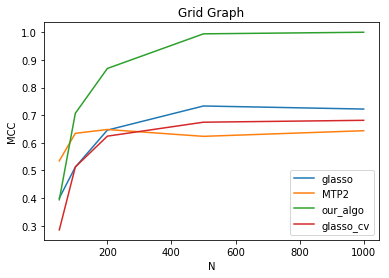

In [21]:

labels = {
    'glasso': 'glasso (best tuning parameter)',
    'MTP2': 'S-H (best tuning parameter)',
    'our_algo': 'Our Algorithm',
    'glasso_cv': 'Cross validated glasso'
}
for method, l in method_to_list.items():
    #print(labels[method])
    plt.plot(list(res.keys()), l, label = labels[method])
plt.xlabel("N")
plt.ylabel("MCC")
plt.title("Grid Graph")
plt.legend()
plt.show()

defaultdict(<class 'list'>, {'glasso': [0.15249647204605385, 0.3127223067306986, 0.5011582265739909, 0.38409838961483195, 0.4208439042849691], 'MTP2': [0.21413903927006775, 0.2575662611393497, 0.23819857369730443, 0.22673958791340718, 0.22385903297245904], 'our_algo': [0.25602255969296694, 0.44744046060092135, 0.6909984177252075, 0.8201859652473729, 0.9143099036852578], 'glasso_cv': [0.05918466453270401, 0.08896562515455662, 0.16078469673653145, 0.7263181124600854, 0.77054003870127]})


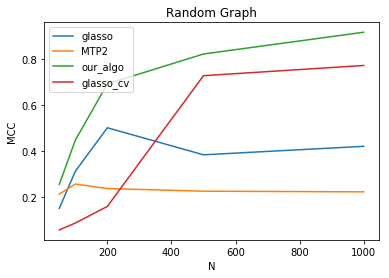

In [23]:
res2, omega2 = pickle.load(open('new_algo_results/random_graph_d_0.05.pkl', 'rb'))
method_to_list_2 = plot_curves(res2, omega2, 'Random Graph')

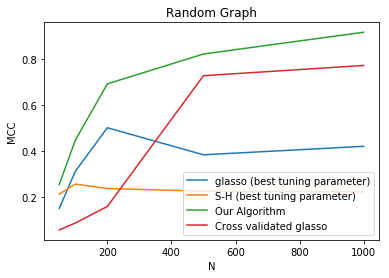

In [28]:

labels = {
    'glasso': 'glasso (best tuning parameter)',
    'MTP2': 'S-H (best tuning parameter)',
    'our_algo': 'Our Algorithm',
    'glasso_cv': 'Cross validated glasso'
}
for method, l in method_to_list_2.items():
    #print(labels[method])
    plt.plot(list(res.keys()), l, label = labels[method])
plt.xlabel("N")
plt.ylabel("MCC")
plt.title("Random Graph")
plt.legend()
plt.show()